


###### Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of.the K for the following features.


In [4]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-0.1.4-py2.py3-none-any.whl size=9606 sha256=2221a2acf664f4467911538e150879692b773103568a4697f535a54b28f134aa
  Stored in directory: /Users/adarshagrahari/Library/Caches/pip/wheels/b5/6f/28/9dd3fc38ca88e9c30712fc6c61aa83dca4dc496c82136c38f2
Successfully built pyforest


In [5]:
from pyforest import *

In [6]:
active_imports()

[]

In [8]:
data=pd.read_csv("takehomedata.csv")

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df1=data.drop(["Gender"],axis=1)

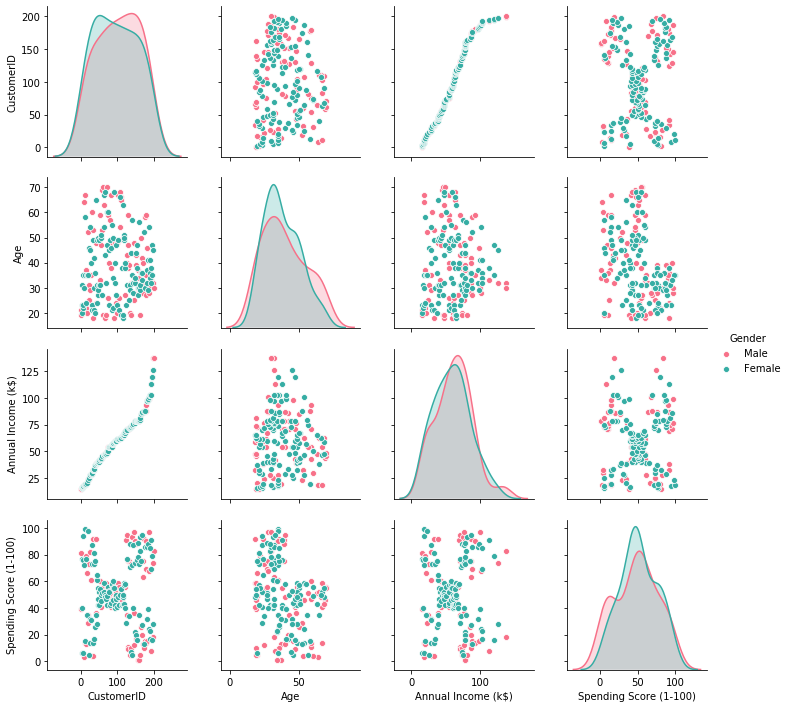

In [14]:

sns.pairplot(data,hue="Gender",palette="husl")

Observations :

        Age and Spendinf Score show fairly more variance when compared oh behalf of Gender

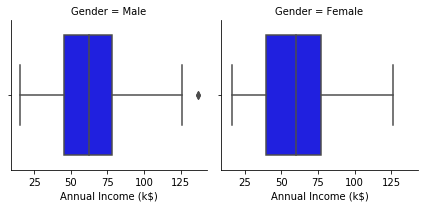

In [17]:
a=sns.FacetGrid(data,col="Gender")
a.map(sns.boxplot,"Annual Income (k$)",color="blue")

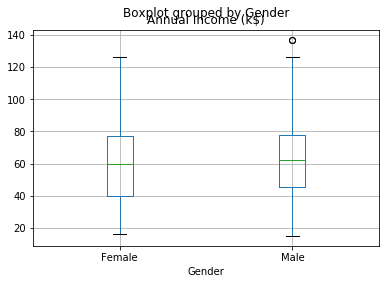

In [18]:
data.boxplot(column="Annual Income (k$)",by="Gender")

In [20]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
df_scaled=df1.apply(zscore)

In [22]:
df_scaled.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


In [23]:
df_scaled.drop(["CustomerID"],axis=1,inplace=True)

In [24]:
cluster_range=range(1,15)
cluster_inertia=[]
for i in cluster_range:
    model=KMeans(n_clusters=i)
    model.fit(df_scaled)
    cluster_inertia.append(model.inertia_)

In [25]:
cluster_inertia

[600.0,
 389.3861889564372,
 295.2122461555488,
 205.22514747675916,
 168.24758017556837,
 133.88887021131026,
 117.13060763524547,
 103.91718304861433,
 92.15428352099588,
 81.85516104651256,
 72.39577983400076,
 67.01802854826259,
 63.900165489633466,
 58.78282375400313]

In [54]:
600-389

211

In [55]:
389-295

94

In [56]:
295-205

90

In [33]:
295-205

90

In [32]:
 205-168

37

In [34]:
168-133

35

Potting elbow graph for these values

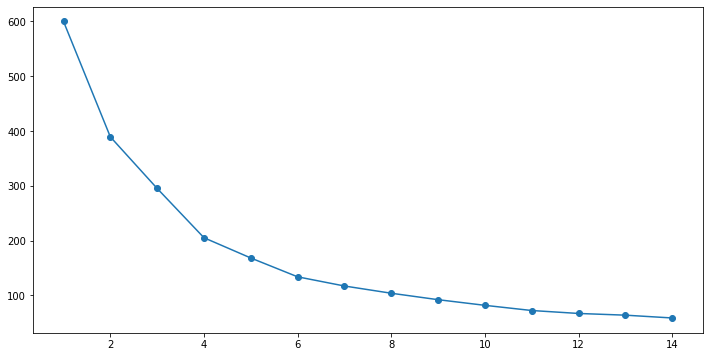

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),cluster_inertia,marker="o")

In [57]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=15)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [58]:
kmeans.inertia_

526.0005589974869

In [59]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.52296653,  0.23619808,  0.19123213,  1.01481481],
       [ 1.08616125, -0.49056525, -0.39717443,  3.        ]])

In [60]:
list(df_scaled.columns)

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'class']

In [61]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))

In [62]:
centroid_df

,Age,Annual Income (k$),Spending Score (1-100),class
0,-0.522967,0.236198,0.191232,1.014815
1,1.086161,-0.490565,-0.397174,3.000000


In [64]:
df_scaled["class"]=kmeans.labels_
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),class
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [65]:
df_scaled["class"].value_counts()

0    135
1     65
Name: class, dtype: int64

In [66]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [67]:
centroid_df

,Age,Annual Income (k$),Spending Score (1-100),class
0,-0.522967,0.236198,0.191232,1.014815
1,1.086161,-0.490565,-0.397174,3.000000


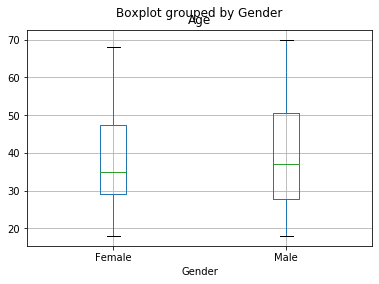

In [48]:
data.boxplot(column="Age",by="Gender")

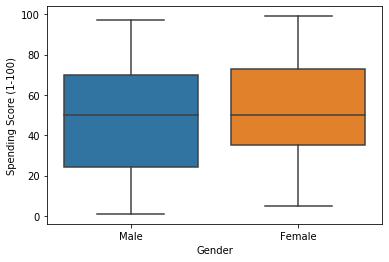

In [53]:
sns.boxplot(data.Gender,data["Spending Score (1-100)"]) #Spending Score of female is 1-100 is higher

We can clearly see the following :
    
        Females have less mean age and more Spending score(1-100)
        Males have more mean age and less spending score
        
Findings From Centroids/Overall KMeans Clustering :
        
        class 0 : Z value of age is less than 0 and spending value more than 0 that is similar to Gender Female
        class 1 : Z Value of age is more then 0 and spending value is less than 0 that is similar to male